In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
cluster_size = 500

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(means[0], cov, cluster_size)
X2 = np.random.multivariate_normal(means[1], cov, cluster_size)
X3 = np.random.multivariate_normal(means[2], cov, cluster_size)
X = np.concatenate((X1, X2, X3), axis = 0)

In [69]:
x = [1, 1, 2, 2]
y = [1, 3, 10, 5]
z = y[np.where(y = 1)]

TypeError: where() missing 1 required positional argument: 'condition'

In [62]:
class kmeans():
    def __init__(self, num_point, num_centers):
        self.num_point = num_point
        self.num_centers = num_centers

    def init_centers(self):
        return X[np.random.choice(range(self.num_point), self.num_centers, replace = False)]
    
    def distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2))
    
    def update_cluster(self, centers):
        labels = []
        for x in X:
            dist = []
            dist1 = self.distance(x, centers[0])
            dist2 = self.distance(x, centers[1])
            dist3 = self.distance(x, centers[2])
            dist.append(dist1); dist.append(dist2); dist.append(dist3)
            labels.append(np.argmax(dist))
        return labels
    
    def update_center(self, labels):
        val0, val1, val2 = 0, 0, 0
        count0, count1, count2 = 0, 0, 0
        centers = []
        for id, label in enumerate(labels):
            if label == 0:
                val0 += X[id]
                count0 += 1
            elif label == 1:
                val1 += X[id]
                count1 += 1
            else:
                val2 += X[id]
                count2 += 1
        if count0 == 0:
            count0 = 1
        if count1 == 0:
            count1 = 1
        if count2 == 0:
            count2 = 1
        centers.append(val0/count0); centers.append(val1/count1); centers.append(val2/count2)
        return np.array(centers)
    
    def run(self):
        centers = self.init_centers()
        labels = self.update_cluster(centers)
        count_iters = 0
        while True:
            new_centers = self.update_center(labels)
            if np.array_equal(new_centers, centers):
                break
            else:
                labels = self.update_cluster(new_centers)
                centers = new_centers
            count_iters += 1
            if count_iters >= 10:
                break
        print("The number of iters is {}".format(count_iters))
        return labels
            

In [65]:
model = kmeans(num_point = 1500, num_centers = 3)
labels = model.run()

The number of iters is 10


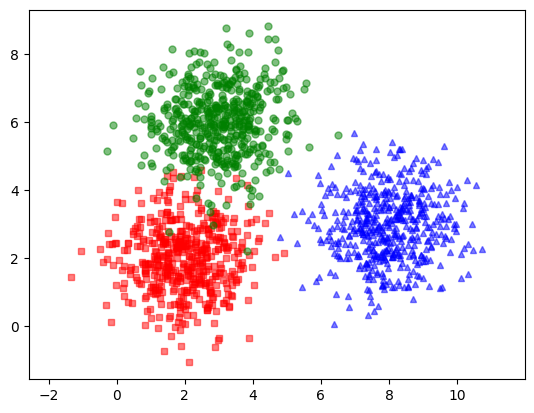

In [10]:
def kmeans_display():
    X1 = X[labels = ]
    plt.plot(X1[:, 0], X1[:, 1], 'rs', markersize = 5, alpha = .5)
    plt.plot(X2[:, 0], X2[:, 1], 'b^', markersize = 5, alpha = .5)
    plt.plot(X3[:, 0], X3[:, 1], 'go', markersize = 5, alpha = .5)

    plt.axis('equal')
    plt.show()

kmeans_display()